## North Carolina Public Schools Report
North Carolina Public Schools Report Card [1] and Statistical Profiles Databases [21] contain a large volume of information about public, charter, and alternative schools in the State of North Carolina. Information that is made publicly accessible comprises data at the school, district, and state levels.  This includes statistics on student and school performance, academic growth, diversity, safety, instructor experience levels, school funding, educational attainment, and much more.

## Data Overview

There were 17 tables of data reviewed within the North Carolina report card database. Two additional tables including racial composition statistics were subsequently located in `Statistical profiles database` [21].

 - **School Profile**: 
    This table contains profiles at the school, district, and state levels from 2006-2016.  Most data in the other database tables link to a single school profile contained in this table using the unit_code field.  Unit codes with the value “NC-SEA” represent profiles at the state level, and unit codes ending in “LEA” represent data at the district level.  Unit codes belonging to individual schools may be mapped to a given district using the first 3 characters of the unit code.  For example, schools belonging to the district “995LEA” will each have unit code that begins with “995”

### Importing data

In [52]:
import pandas as pd

# Read in the School Profile data
nc_profile = pd.ExcelFile('data/PROFILE.xlsx')

# type(nc_profile) returns: pandas.io.excel.ExcelFile
# print the sheets in the Excel file
# print(nc_profile.sheet_names) returns: ['PROFILE']

# Import sheets from Excel files as data frames.
nc_profile_df = nc_profile.parse('PROFILE')
nc_profile_df.shape


(32603, 35)

### Cleaning data

Data almost never comes in clean, so we need to prepare data for analysis. First step would be to diagnose data for problems.
 - Common data problems include:
     - Inconsistent column names
     - Missing data
     - Outliers
     - Duplicate rows
     - Untidy
     - Need to process columns
     - Columns types can signal unexpected data values

#### Inconsistent column names
Let's start by inspecting the first common data problem: Inconsistent column names. To do this, we need to get the list of column names from the dataframe `nc_profile_df`.

In [53]:
nc_profile_df.columns

Index(['vphone_ad', 'year', 'unit_code', 'street_ad', 'scity_ad', 'state_ad',
       'szip_ad', 'type_cd', 'closed_ind', 'new_ind', 'super_nm',
       'category_cd', 'url_ad', 'grade_range_cd', 'calendar_type_txt',
       'sna_pgm_type_cd', 'cover_letter_ad', 'school_type_txt',
       'calendar_only_txt', 'title1_type_cd', 'clp_ind', 'focus_clp_ind',
       'summer_program_ind', 'asm_no_spg_ind', 'no_data_spg_ind', 'Lea_Name',
       'School_Name', 'State_Name', 'esea_status', 'student_num',
       'lea_avg_student_num', 'st_avg_student_num', 'Grad_project_status',
       'stem', 'url'],
      dtype='object')

By visually inspecting the column names, it can be seen that these column names are in pretty good shape, i.e there are no spaces between the column names and most of them seem to be consistently named with `underscore` separating the words. The column names: `School_Name`, `State_Name`, `Lea_Name`, `Grad_project_status` appear to start with capital letters. We could choose to leave them as is or convert them to lower case to be consistent. 

#### Missing data
To get an idea about the columns with missing data, we can use the `info()` method. 

In [54]:
nc_profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32603 entries, 0 to 32602
Data columns (total 35 columns):
vphone_ad              32603 non-null object
year                   32603 non-null int64
unit_code              32603 non-null object
street_ad              32536 non-null object
scity_ad               32536 non-null object
state_ad               32536 non-null object
szip_ad                32536 non-null float64
type_cd                32536 non-null object
closed_ind             32536 non-null float64
new_ind                32536 non-null float64
super_nm               5625 non-null object
category_cd            32510 non-null object
url_ad                 31138 non-null object
grade_range_cd         27589 non-null object
calendar_type_txt      27577 non-null object
sna_pgm_type_cd        27524 non-null object
cover_letter_ad        15956 non-null object
school_type_txt        27577 non-null object
calendar_only_txt      27534 non-null object
title1_type_cd         12776 non-nu

From the output it is evident that many columns have missing data in them. Missing data may not necessarily mean that we have an issue, there are a myriad of reasons for missing data. Each column needs to be investigated.

In [55]:
nc_profile2016 = nc_profile_df[nc_profile_df['year'] == 2016]
nc_profile2016.shape

(3071, 35)

### School profiles for 2016
In reviewing the Profile table, there were a total 3,071 school profiles in North Carolina for 2016. This included profiles at the individual school (2,597), district (468), and state (6) levels.  (this can be derived from unit_code). 

At each of the 3 profile levels, there are 6 categories.
* **E**: School has elementary schools(PK-5)
* **M**: School has middle school grades(6-8)
* **H**: School has high school grades(9-13)
* **I**: School has elementary and middle school grades
* **T**: School has middle and high school grades
* **A**: School has elementary, middle and high school grades

There were 18 closed school profiles and 0 new school profiles for the year 2016.  Once district, state, and closed school profiles are excluded, there are `2,579 “active” school level profiles` in the State of North Carolin

In [56]:
nc_all = pd.read_csv("https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/All_Data_By_School_Final.csv", 
                     low_memory=False)

In [57]:
nc_all.head()

,Year,unit_code,street_ad,scity_ad,state_ad,szip_ad,type_cd_txt,Closed_Ind_Text,New_ind_Txt,category_cd,...,Dist_Tch_Exp_Pct_10+_Years,State_Tch_Exp_Pct_0_3_Years,State_Tch_Exp_Pct_4_10_Years,State_Tch_Exp_Pct_10+_Years,Dist_Prin_Exp_Pct_0_3_Years,Dist_Prin_Exp_Pct_4_10_Years,Dist_Prin_Exp_Pct_10+_Years,State_Prin_Exp_Pct_0_3_Years,State_Prin_Exp_Pct_4_10_Years,State_Prin_Exp_Pct_10+_Years
0,2016,49E000,104 Yellow Wood Circle,Mooresville,NC,28115,Charter,Open,School Is Not New,A,...,NaN,0.227,0.226,0.547,NaN,NaN,NaN,0.43,0.427,0.143
1,2016,92E000,202 Treybrooke Drive,Morrisville,NC,27560,Charter,Open,School Is Not New,I,...,NaN,0.255,0.254,0.491,NaN,NaN,NaN,0.43,0.427,0.143
2,2016,010303,1247 Jimmie Kerr Road,Graham,NC,27253,Public,Open,School Is Not New,H,...,0.518,0.231,0.235,0.534,0.417,0.417,0.167,0.43,0.427,0.143
3,2016,010304,2518 NC 54,Graham,NC,27253,Public,Open,School Is Not New,E,...,0.468,0.227,0.273,0.500,0.417,0.417,0.167,0.43,0.427,0.143
4,2016,010308,2832 N NC 87,Elon,NC,27244,Public,Open,School Is Not New,E,...,0.468,0.227,0.273,0.500,0.417,0.417,0.167,0.43,0.427,0.143


Get a list of column names and their types.

In [58]:
nc_all.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 293 columns):
Year                                              int64
unit_code                                         object
street_ad                                         object
scity_ad                                          object
state_ad                                          object
szip_ad                                           int64
type_cd_txt                                       object
Closed_Ind_Text                                   object
New_ind_Txt                                       object
category_cd                                       object
school_type_txt                                   object
calendar_only_txt                                 object
title1_type_flg                                   int64
clp_ind_flg                                       int64
focus_clp_flg                                     int64
summer_program_flg                        

Groupby different school levels, i.e school, lea, state and plot the counts. To do this, we first need to parse the 'unit_code' field and create a new field called 'school_type'. The school_type variable will have one of three values: school, lea, state. After creating 'school_type', we can groupby the school_type variable and calculate statistics.

In [45]:
cols = ['unit_code', 'category_cd', 'scity_ad', 'type_cd_txt', 'school_type_txt']
print(nc_all.loc[:, cols].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 5 columns):
unit_code          2579 non-null object
category_cd        2579 non-null object
scity_ad           2579 non-null object
type_cd_txt        2579 non-null object
school_type_txt    2579 non-null object
dtypes: object(5)
memory usage: 100.8+ KB
None


In [46]:
print(nc_all.loc[:, cols])

     unit_code category_cd       scity_ad type_cd_txt        school_type_txt
0       49E000           A    Mooresville     Charter         Regular School
1       92E000           I    Morrisville     Charter         Regular School
2       010303           H         Graham      Public         Regular School
3       010304           E         Graham      Public         Regular School
4       010308           E           Elon      Public         Regular School
5       010310           M     Burlington      Public         Regular School
6       010311           H     Burlington      Public   Vocational Education
7       010312           E     Burlington      Public         Regular School
8       010320           E         Mebane      Public         Regular School
9       010324           H         Mebane      Public         Regular School
10      010326           E     Burlington      Public         Regular School
11      010328           E     Burlington      Public         Regular School

In [47]:
print(nc_all.loc[200:250, cols])

    unit_code category_cd            scity_ad type_cd_txt  \
200    120352           A           Morganton      Public   
201    120360           E           Morganton      Public   
202    120364           E           Morganton      Public   
203    120368           E             Hickory      Public   
204    120370           H           Morganton      Public   
205    120372           E  Rutherford College      Public   
206    120374           E           Morganton      Public   
207    120376           M           Morganton      Public   
208    120380           E             Valdese      Public   
209    120386           E           Morganton      Public   
210    120390           M           Morganton      Public   
211    130304           E             Concord      Public   
212    130307           H             Concord      Public   
213    130308           E             Midland      Public   
214    130309           E             Concord      Public   
215    130310           

Get count of category_cd

In [61]:
categories = nc_all.groupby('category_cd').unit_code.count()
print(type(categories))
print(categories)

<class 'pandas.core.series.Series'>
category_cd
A      63
E    1320
H     505
I     142
M     478
T      71
Name: unit_code, dtype: int64


In [62]:
# import Matplotlib.pyplot for plotting functions
import matplotlib.pyplot as plt

# by including this, you don't have to call plt.plot() each time.
%matplotlib inline

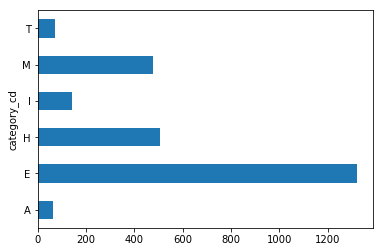

In [63]:
# plot a histogram, assigning it a variable makes it display just the plot.
ax = categories.plot(kind='barh')

In [13]:
nc_all.category_cd.describe()

count     2579
unique       6
top          E
freq      1320
Name: category_cd, dtype: object

In [17]:
nc_all.category_cd.value_counts()
#type(nc_all.category_cd.value_counts())

E    1320
H     505
M     478
I     142
T      71
A      63
Name: category_cd, dtype: int64

In [18]:
nc_all.category_cd.value_counts(normalize=True)

E    0.511826
H    0.195812
M    0.185343
I    0.055060
T    0.027530
A    0.024428
Name: category_cd, dtype: float64

51% of the schools are E

In [21]:
nc_all.category_cd.unique()
#print(type(nc_all.category_cd.unique()))

array(['A', 'I', 'H', 'E', 'M', 'T'], dtype=object)

In [22]:
nc_all.category_cd.nunique()

6

In [40]:
nc_all[nc_all.unit_code.str.match('*SEA*')]

error: nothing to repeat at position 0

### Question: Which category has the highest funding ?